In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 쥬피터노트북 버전확인
import sys

print("--sys.version—")
print(sys.version)

In [40]:
# 한글폰트 깨짐 방지

from matplotlib import font_manager, rc

font_path = '../visualization/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 마이너스 부호 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


EDA 분석(탐색적 데이터 분석)

In [7]:
pd.read_csv('../../data_add/auto-mpg.csv')
data = pd.read_csv('../../data_add/auto-mpg.csv', header = None)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
df = data.copy()

In [10]:
df.columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'orgin', 'name'
]

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,orgin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'orgin', 'name'],
      dtype='object')

In [16]:
df.shape

(398, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   orgin         398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
df.dtypes # 자료형 확인

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
orgin             int64
name             object
dtype: object

In [19]:
df.describe() # 요약통계량

,mpg,cylinders,displacement,weight,acceleration,model year,orgin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
df.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,orgin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [29]:
raw = pd.read_excel('../../data_add/남북한발전전력량.xlsx')
raw.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [30]:
df = raw.copy()

In [31]:
# 남한 북한 반전량 합계 데이터만 추출

df['발전 전력별']

0     합계
1     수력
2     화력
3    원자력
4    신재생
5     합계
6     수력
7     화력
8    원자력
Name: 발전 전력별, dtype: object

In [32]:
df.iloc[[0,5], 2:]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
5,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


In [33]:
df = df.iloc[[0,5], 2 : ]
df.index = ['대한민국', '북한']

In [56]:
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
대한민국,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
북한,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


In [57]:
df.columns = df.columns.map(float)

In [58]:
df_t = df.T

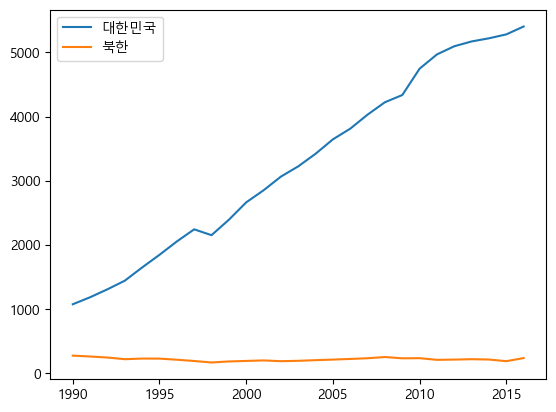

In [59]:
df_t.plot()
plt.show()

<AxesSubplot:>

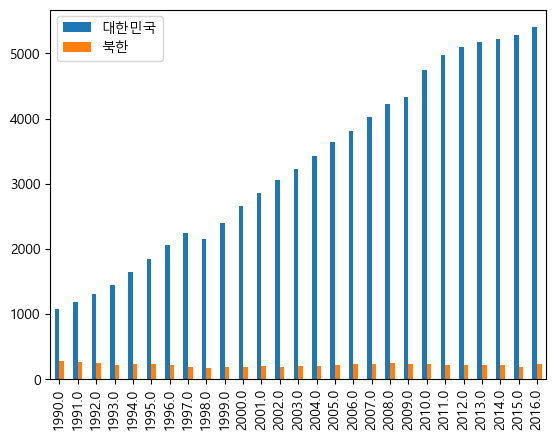

In [60]:
df_t.plot(kind = 'bar')


(array([[ 0.,  2.,  3.,  4.,  2.,  3.,  3.,  3.,  1.,  6.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([170.0, 693.4, 1216.8, 1740.1999999999998, 2263.6, 2787.0,
        3310.3999999999996, 3833.7999999999997, 4357.2, 4880.599999999999,
        5404.0], dtype=object),
 <a list of 2 BarContainer objects>)

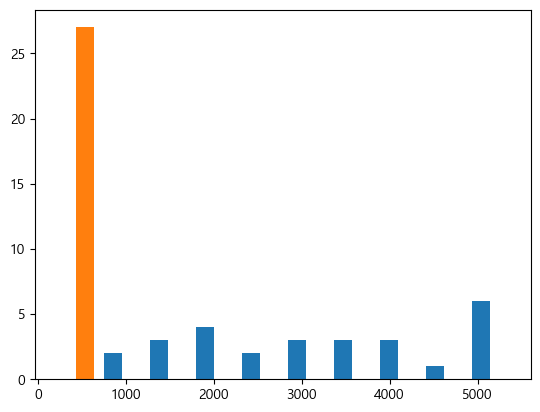

In [63]:
# 히스토그램

plt.hist(df_t)

In [69]:
df = data.copy()

df.columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'orgin', 'name'
]
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
orgin           398
name            398
dtype: int64

In [72]:
df['cylinders'].value_counts() #(****)

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [73]:
df.mean()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_14120\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
orgin              1.572864
dtype: float64

In [74]:
df.median()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_14120\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model year        76.0
orgin              1.0
dtype: float64

In [79]:
df[['displacement', 'mpg']].mean()

displacement    193.425879
mpg              23.514573
dtype: float64

In [80]:
df.max()

mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                     ?
weight                    5140.0
acceleration                24.8
model year                    82
orgin                          3
name            vw rabbit custom
dtype: object

In [81]:
df.min()

mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                        100.0
weight                           1613.0
acceleration                        8.0
model year                           70
orgin                                 1
name            amc ambassador brougham
dtype: object

In [88]:
df.std() # 평균에서 많이 떨어진 것들은 이상치가 많을수도있다.


C:\Users\SBAUser\AppData\Local\Temp\ipykernel_14120\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
orgin             0.802055
dtype: float64

In [91]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,orgin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
orgin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [92]:
df[['model year', 'mpg']].corr()

,model year,mpg
model year,1.000000,0.579267
mpg,0.579267,1.000000


<AxesSubplot:xlabel='weight', ylabel='mpg'>

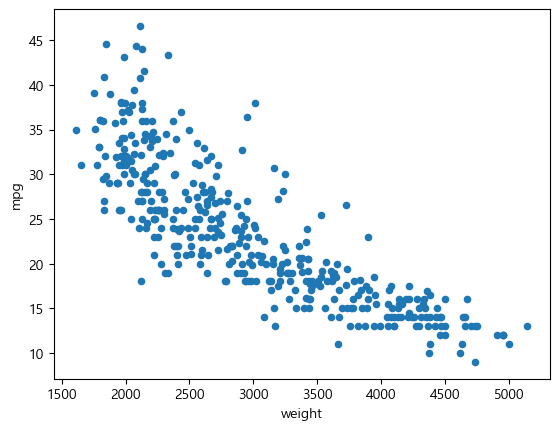

In [66]:
df.plot(x = 'weight', y = 'mpg', kind = 'scatter')

<AxesSubplot:>

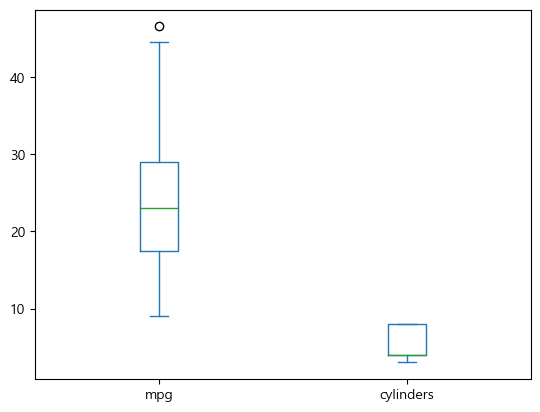

In [68]:
# boxplot

df[['mpg', 'cylinders']].plot(kind='box')